downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg
[0.]
[[  0.   0.]
 [600.   0.]
 [  0. 600.]]
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


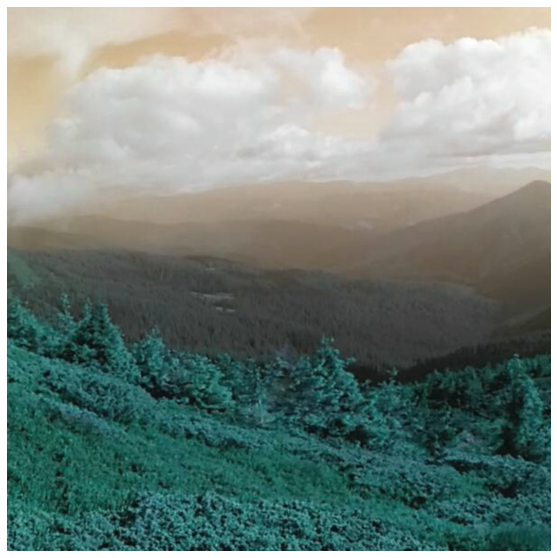

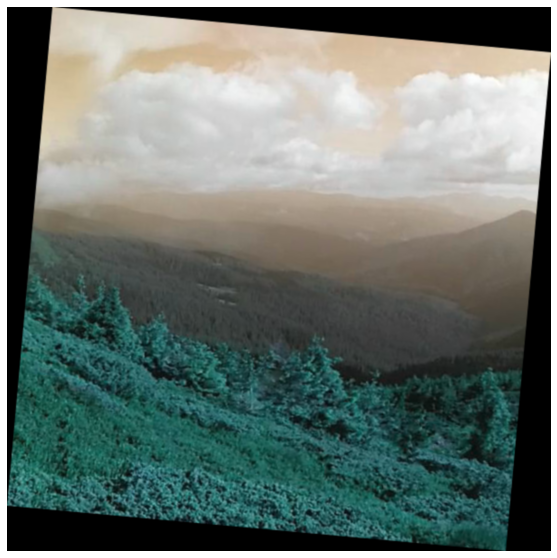

In [5]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

def cv2_imshow(img):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.axis("off")
    plt.show()

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

M = np.array([pts1[0,0], ])

print(M)

print(pts1)
print(pts2)



# implement this function
M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,img.shape[:2])
cv2_imshow(img)
cv2_imshow(dst)

In [35]:
a11 = M[0,0]
a12 = M[0,1]
b1 = M[0,2]
a21 = M[1,0]
a22 = M[1,1]
b2 = M[1,2]

X = np.array([
    [a11,a12,b1, 0,0,0, 0,0,0],
    [a21,a22,b2, 0,0,0, 0,0,0],
    [0,0,0, a11,a12,b1, 0,0,0],
    [0,0,0, a21,a22,b2, 0,0,0],
    [0,0,0, 0,0,0, a11,a12,b1],
    [0,0,0, 0,0,0, a21,a22,b2],
])

v1 = np.append(pts1, np.ones((3,1)), axis=1)
v2 = X.dot(v1.reshape(9,1)).reshape((3,2))

print(v1)
print(v2)

[[  0.   0.   1.]
 [600.   0.   1.]
 [  0. 600.   1.]]
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]


In [43]:
a11 = pts1[0]
a12 = pts1[1]
b1 = 1
a21 = pts1[0]
a22 = pts1[1]
b2 = 1

X = np.array([
    [pts1[0,0],pts1[0,1],1, 0,0,0],
    [0,0,0, pts1[0,0],pts1[0,1],1],
    
    [pts1[1,0],pts1[1,1],1, 0,0,0],
    [0,0,0, pts1[1,0],pts1[1,1],1],
    
    [pts1[2,0],pts1[2,1],1, 0,0,0],
    [0,0,0, pts1[2,0],pts1[2,1],1],
])

v2 = X.dot(M.reshape(6,1)).reshape(3,2)

print(v1)
print(v2)

[[  0.   0.   1.]
 [600.   0.   1.]
 [  0. 600.   1.]]
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]


In [52]:
Mx = np.linalg.solve(X, pts2.reshape(6,1))
print(np.allclose(np.dot(X, Mx.reshape(6,1)), v2.reshape(6,1)))
print(Mx.reshape(2,3))

True
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


In [47]:
M

array([[ 0.91666667, -0.08333333, 50.        ],
       [ 0.08333333,  0.91666667,  0.        ]])